<a href="https://colab.research.google.com/github/AnnPike/final-project-ML/blob/master/Visualisation_of_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pickle
import matplotlib.pyplot as plt
save_to = "/content/gdrive/My Drive/nets_to_compute_smoothness/"

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


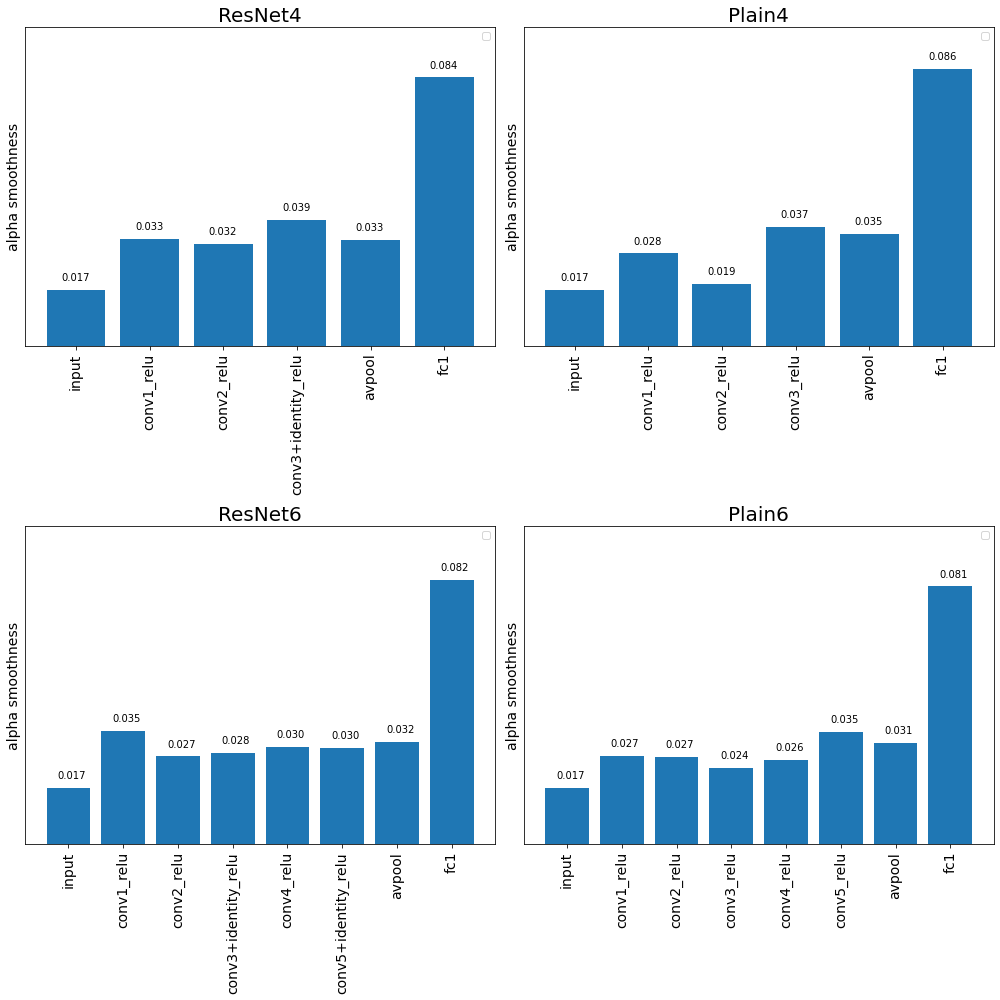

In [104]:
plt.figure(figsize=(14,14))
for idx, net in enumerate(['ResNet4','Plain4', 'ResNet6', 'Plain6']): 
  alpha_dict = pickle.load(open(save_to+'alpha_dict_'+net,'rb'))
  ax = plt.subplot(2,2,idx+1)
  ax.bar(list(alpha_dict.keys()), height=list(alpha_dict.values()))
  for i, v in enumerate(list(alpha_dict.values())):
    ax.text(i-0.2, v+0.003, str(v)[:5], color='k')
  plt.ylim([0,0.1])
  plt.xticks(rotation=90, fontsize=14)
  plt.yticks([])
  plt.ylabel('alpha smoothness', fontsize=14)
  plt.title(net, fontsize=20)
  plt.legend()
plt.tight_layout()
plt.show()

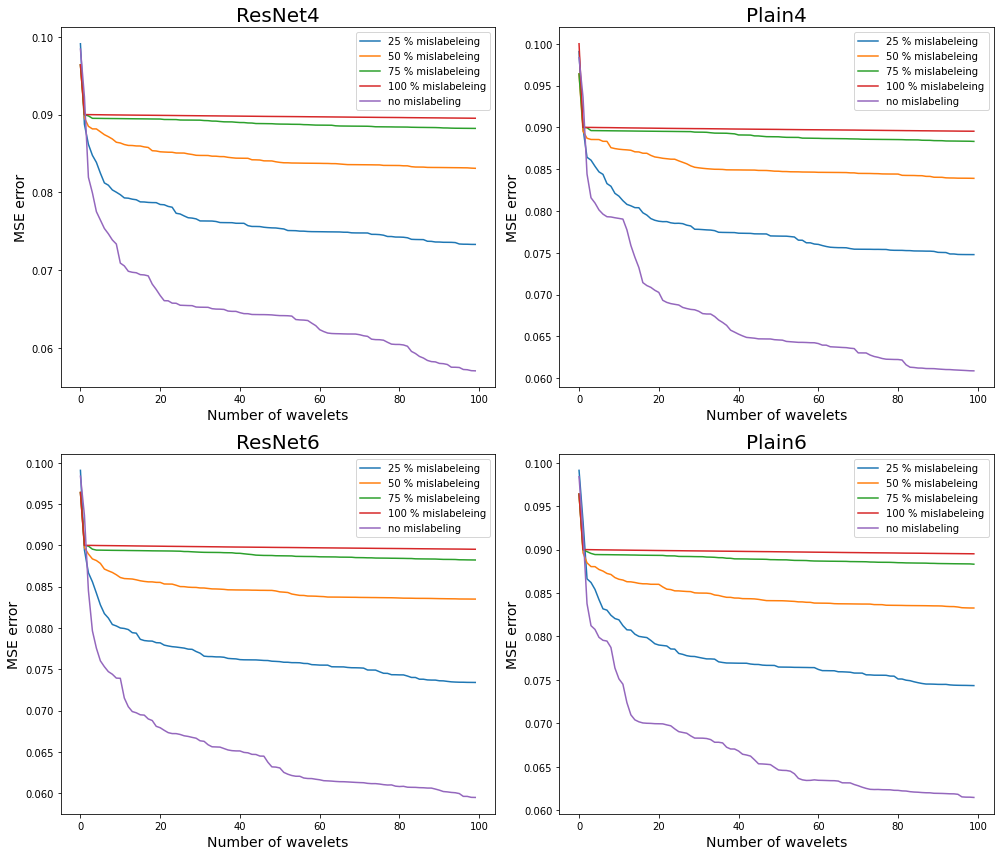

In [129]:
plt.figure(figsize=(14,12))
for idx, net in enumerate(['ResNet4','Plain4', 'ResNet6','Plain6']):
    plt.subplot(2, 2, idx+1)
    MSE_errors_no_misslab = pickle.load(open(save_to+'MSE_errors_no_misslab_'+net,'rb'))
    for mislab in [0.25,0.5, 0.75, 1]:
      MSE_errors = pickle.load(open(save_to+'MSE_mislab_'+str(mislab)+'_'+net,'rb'))
      plt.plot(MSE_errors,label = str(int(mislab*100))+' % mislabeleing')
    plt.plot(MSE_errors_no_misslab,label = 'no mislabeling')
    plt.ylabel('MSE error', fontsize=14)
    plt.xlabel('Number of wavelets', fontsize=14)
    plt.title(net, fontsize=20)
    plt.legend()
plt.tight_layout()
fig.show()

[0.08428900758965922, 0.04133337040536598, 0.02010290060527317, 0.007531797574599326, 0.004607634381938048]
[0.08694066499560134, 0.041420569579229106, 0.018085542558388252, 0.007133721473404679, 0.004657352918274107]
[0.08295385734597784, 0.040176752053134826, 0.018354676506295492, 0.0071642000919553955, 0.004610530319363806]
[0.08104296489450759, 0.04097267089214427, 0.018151205413842075, 0.007953931774420619, 0.006501206630943582]


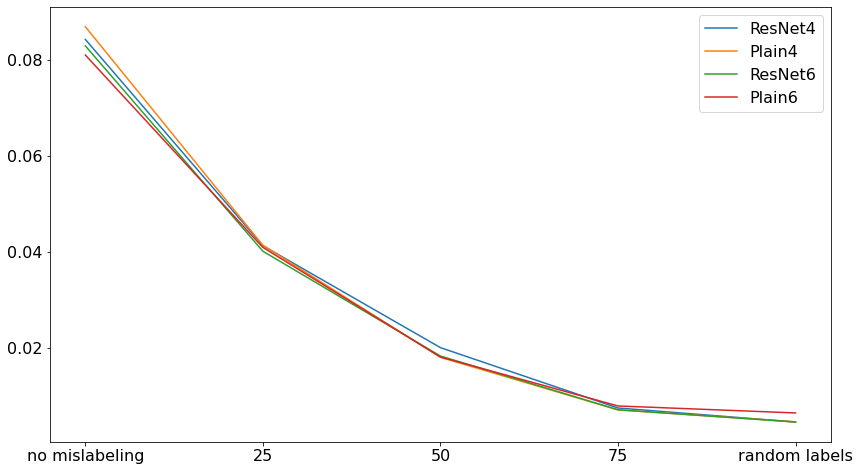

In [146]:
plt.figure(figsize=(14,8))
for net in ['ResNet4','Plain4', 'ResNet6','Plain6']:
  alpha_dict = pickle.load(open(save_to+'alpha_dict_'+net,'rb'))
  alpha_list = pickle.load(open(save_to+'alpha_list_mislab'+'_'+net,'rb'))
  alpha_list.insert(0, alpha_dict['fc1']) 
  print(alpha_list)
  plt.plot(['no mislabeling', 25,50,75,'random labels'],alpha_list, label=net)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.legend(fontsize=16)
  plt.show